<a href="https://colab.research.google.com/github/rayhandestian/Pengantar-Sains-Data/blob/main/Tugas%201%20-%20EDA%20Diet/EDA_Diet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== First Five Rows ===
  Diet_type                                        Recipe_name      Cuisine_type  Protein(g)  Carbs(g)  Fat(g) Extraction_day Extraction_time
0     paleo                    Bone Broth From 'Nom Nom Paleo'          american        5.22      1.29    3.20     2022-10-16        17:20:09
1     paleo  Paleo Effect Asian-Glazed Pork Sides, A Sweet ...  south east asian      181.55     28.62  146.14     2022-10-16        17:20:09
2     paleo                                  Paleo Pumpkin Pie          american       30.91    302.59   96.76     2022-10-16        17:20:09
3     paleo                       Strawberry Guacamole recipes           mexican        9.62     75.78   59.89     2022-10-16        17:20:09
4     paleo  Asian Cauliflower Fried "Rice" From 'Nom Nom P...           chinese       39.84     54.08   71.55     2022-10-16        17:2

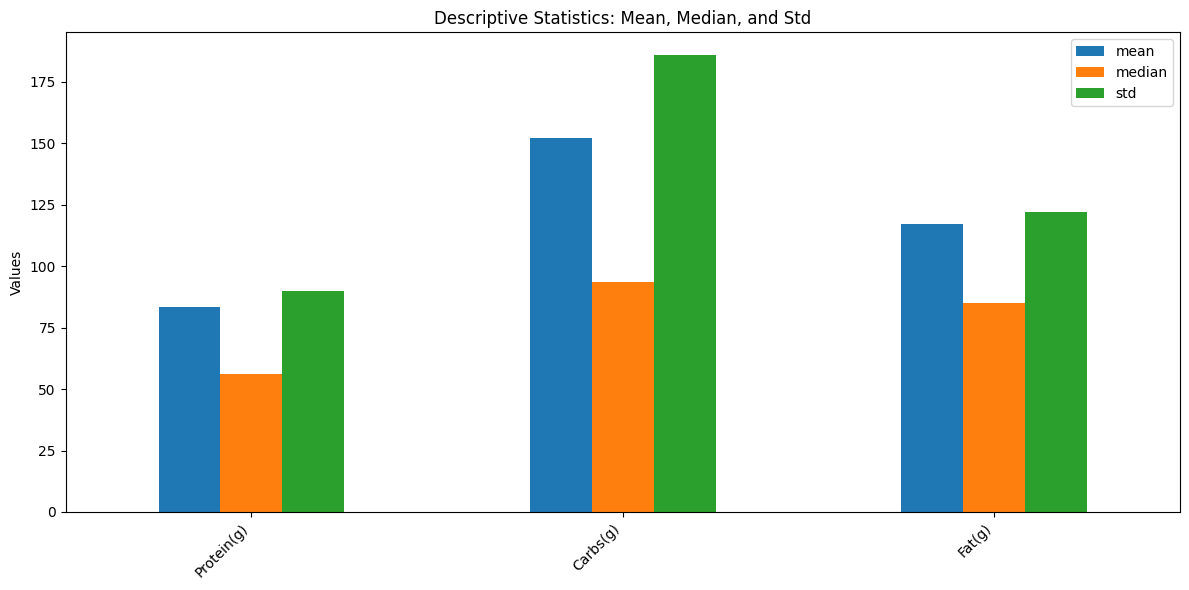

In [ ]:
# Tugas 1 Pengantar Data Sains: Exploratory Data Analysis (EDA)
# GEMA FITRI RAMADANI (105222009)
# RAYHAN SURYA DESTIAN (105222024)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/Pengantar Sains Data/Tugas 1 - EDA Diet')

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 600)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load data
df = pd.read_csv('diet_data.csv')

# 1. Data Inspection
print("=== First Five Rows ===")
print(df.head(), "\n")

print("=== Dataset Information ===")
df.info()
print()

print("=== Missing Values ===")
print(df.isnull().sum(), "\n")

# 2. Descriptive Statistics
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

desc_stats = df[numeric_cols].describe().T
desc_stats['median'] = df[numeric_cols].median()
desc_stats['mode'] = df[numeric_cols].mode().iloc[0]

print("=== Descriptive Statistics ===")
print(desc_stats[['mean', 'median', 'mode', 'std', 'min', '25%', '50%', '75%', 'max']], "\n")

# Bar chart for Mean, Median, and STD
desc_stats_plot = desc_stats[['mean', 'median', 'std']].plot(kind='bar', figsize=(12, 6))
plt.title('Descriptive Statistics: Mean, Median, and Std')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

=== Distribution Analysis with Skewness and Kurtosis ===
            Skewness  Kurtosis
Protein(g)      3.18     22.15
Carbs(g)        4.36     41.58
Fat(g)          3.86     33.41 



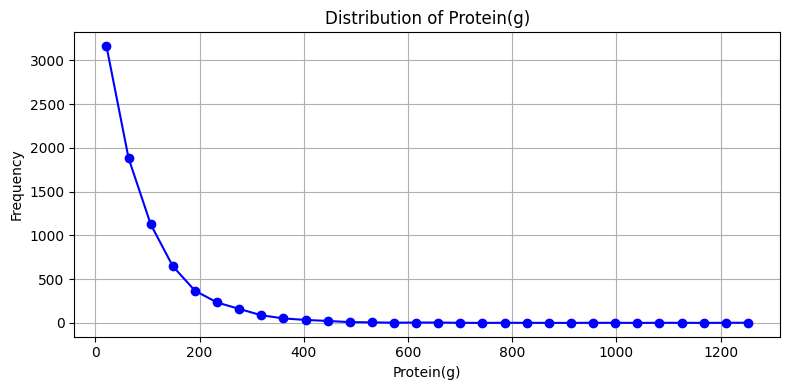

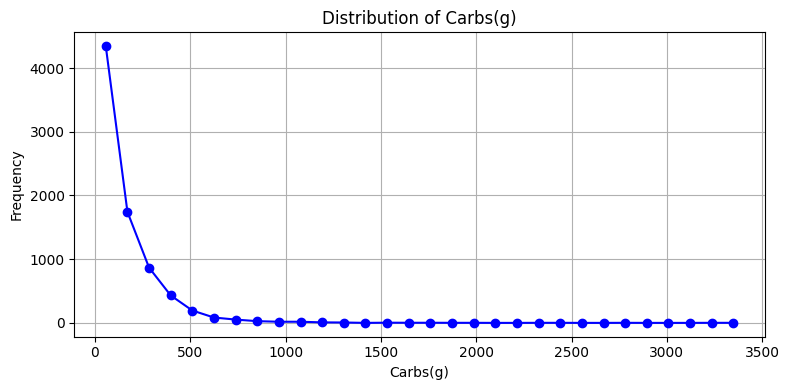

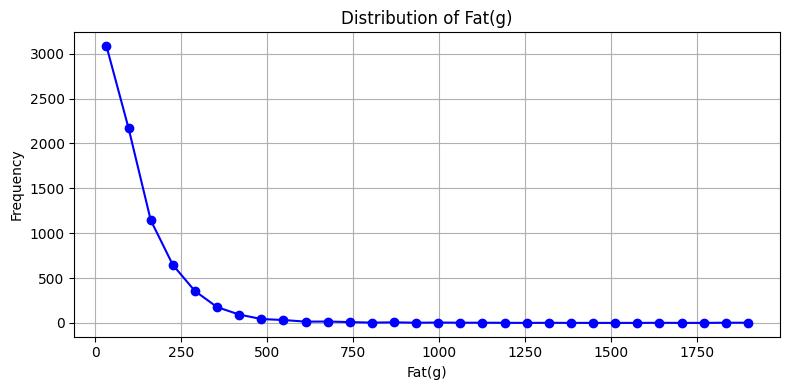

In [ ]:
# 3. Distribution Analysis
print("=== Distribution Analysis with Skewness and Kurtosis ===")

distribution_stats = pd.DataFrame({
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurt()
})
print(distribution_stats, "\n")

for col in numeric_cols:
    plt.figure(figsize=(8, 4))

    data = df[col].dropna()

    counts, bin_edges = np.histogram(data, bins=30)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    plt.plot(bin_centers, counts, marker='o', linestyle='-', color='b')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# 4 Categorization
categorical_cols = ['Diet_type', 'Cuisine_type']
for category in categorical_cols:
    if category in df.columns:
        counts = df[category].value_counts().reset_index()
        counts.columns = [category, 'Counts']
        print(f"=== Category Counts for '{category}' ===")
        print(counts, "\n")
    else:
        print(f"=== Column '{category}' does not exist in the DataFrame ===\n")


=== Category Counts for 'Diet_type' ===
       Diet_type  Counts
0  mediterranean    1753
1           dash    1745
2          vegan    1522
3           keto    1512
4          paleo    1274 

=== Category Counts for 'Cuisine_type' ===
        Cuisine_type  Counts
0           american    2907
1      mediterranean    1744
2            italian     799
3             french     604
4              world     259
5            british     239
6            mexican     224
7             nordic     152
8   south east asian     148
9     south american     137
10             asian     126
11           chinese     120
12            indian      92
13    middle eastern      91
14    eastern europe      55
15          japanese      50
16    central europe      34
17         caribbean      18
18            kosher       7 



=== Correlation Matrix for Each Diet Type ===
              Protein(g) Carbs(g) Fat(g)
paleo               0.51     0.49   0.59
vegan               0.56     0.61   0.54
keto                0.56     0.46   0.60
mediterranean       0.62     0.52   0.60
dash                0.60     0.55   0.66 



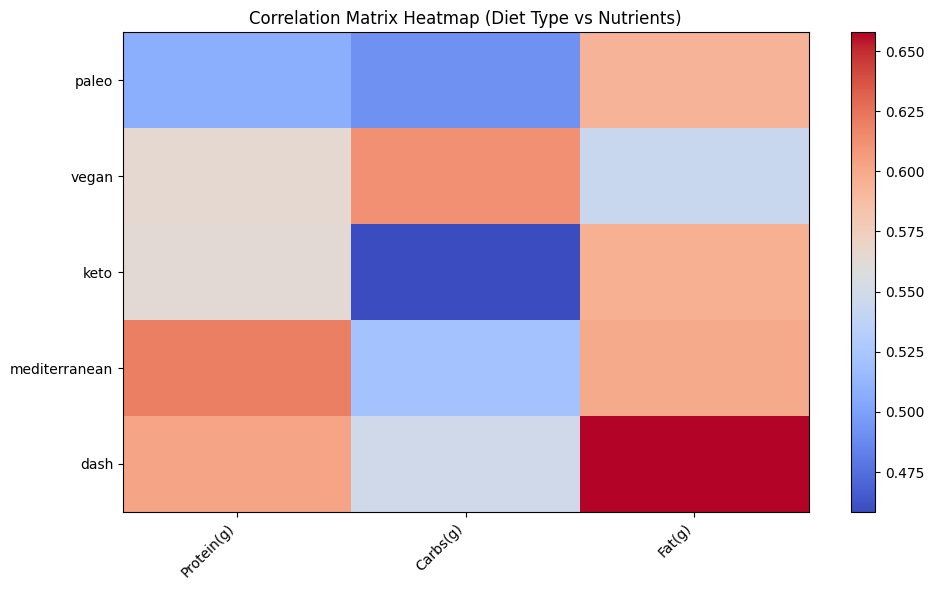

In [ ]:
# 5. Correlation Analysis for Diet Types

# Group the data by 'Diet_type' and compute correlation matrix
corr_matrix = df.groupby('Diet_type')[['Protein(g)', 'Carbs(g)', 'Fat(g)']].corr()

diet_corr = pd.DataFrame(index=df['Diet_type'].unique(), columns=['Protein(g)', 'Carbs(g)', 'Fat(g)'])

for diet in df['Diet_type'].unique():
    diet_data = df[df['Diet_type'] == diet][['Protein(g)', 'Carbs(g)', 'Fat(g)']]
    diet_corr.loc[diet] = diet_data.corr().mean()

print("=== Correlation Matrix for Each Diet Type ===")
print(diet_corr, "\n")

plt.figure(figsize=(10, 6))
plt.imshow(diet_corr.astype(float), cmap='coolwarm', interpolation='none', aspect='auto')

plt.colorbar()

plt.xticks(ticks=np.arange(len(diet_corr.columns)), labels=diet_corr.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(diet_corr.index)), labels=diet_corr.index)

plt.title('Correlation Matrix Heatmap (Diet Type vs Nutrients)')
plt.tight_layout()

plt.show()

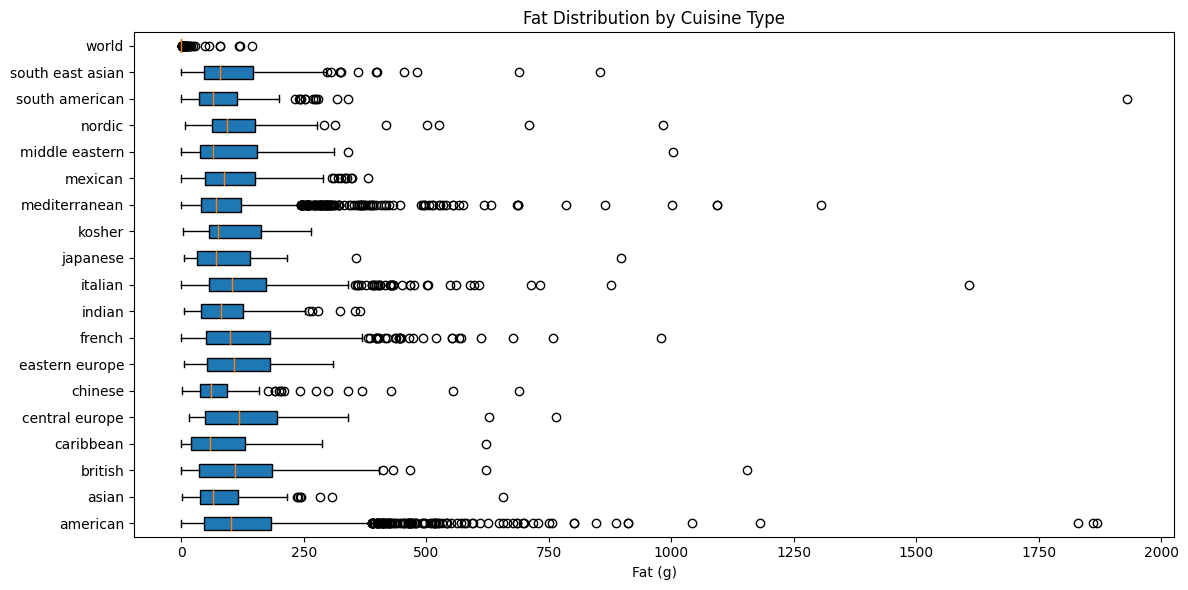

In [ ]:
# 6. Fat by Cuisine Type

# Group the data by 'Cuisine_type' and get the 'Fat(g)' values for each group
cuisine_fat_data = df.groupby('Cuisine_type')['Fat(g)'].apply(list)

fat_values = [values for values in cuisine_fat_data]

plt.figure(figsize=(12, 6))
plt.boxplot(fat_values, vert=False, patch_artist=True)

plt.yticks(ticks=np.arange(1, len(cuisine_fat_data.index) + 1), labels=cuisine_fat_data.index)

plt.xlabel('Fat (g)')
plt.title('Fat Distribution by Cuisine Type')

plt.tight_layout()
plt.show()